<a href="https://colab.research.google.com/github/Nagib005/Inverse_Design/blob/main/Forward_ana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import random

# Setup
source_path = "/content/drive/MyDrive/Circular_inverse/result_V.csv"
test_path = "/content/drive/MyDrive/Circular_inverse/result_V_test_30.csv"

chunk_size = 10000
sample_fraction = 0.1
first_chunk = True

reader = pd.read_csv(source_path, header=None, chunksize=chunk_size)

for i, chunk in enumerate(reader):
    # Random 30% from this chunk
    df_sample = chunk.sample(frac=sample_fraction, random_state=42)

    # Append to output file
    df_sample.to_csv(test_path, mode='a', index=False, header=first_chunk)
    first_chunk = False  # Only write header once

    print(f"✅ Processed chunk {i+1}, sampled {df_sample.shape[0]} rows")

print("🎉 Test file (30%) successfully created at:", test_path)


Streaming output truncated to the last 5000 lines.
✅ Processed chunk 6799, sampled 1000 rows
✅ Processed chunk 6800, sampled 1000 rows
✅ Processed chunk 6801, sampled 1000 rows
✅ Processed chunk 6802, sampled 1000 rows
✅ Processed chunk 6803, sampled 1000 rows
✅ Processed chunk 6804, sampled 1000 rows
✅ Processed chunk 6805, sampled 1000 rows
✅ Processed chunk 6806, sampled 1000 rows
✅ Processed chunk 6807, sampled 1000 rows
✅ Processed chunk 6808, sampled 1000 rows
✅ Processed chunk 6809, sampled 1000 rows
✅ Processed chunk 6810, sampled 1000 rows
✅ Processed chunk 6811, sampled 1000 rows
✅ Processed chunk 6812, sampled 1000 rows
✅ Processed chunk 6813, sampled 1000 rows
✅ Processed chunk 6814, sampled 1000 rows
✅ Processed chunk 6815, sampled 1000 rows
✅ Processed chunk 6816, sampled 1000 rows
✅ Processed chunk 6817, sampled 1000 rows
✅ Processed chunk 6818, sampled 1000 rows
✅ Processed chunk 6819, sampled 1000 rows
✅ Processed chunk 6820, sampled 1000 rows
✅ Processed chunk 6821, s

In [ ]:
# 📌 STEP 3: Load the test file and prepare input/output

# Load the saved test file
df_test = pd.read_csv(test_path, header=None)

# Split into input (x) and output (y)
x = df_test.iloc[:, 0:6].to_numpy()
y = df_test.iloc[:, 6:8].to_numpy()

# Normalize input
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

print("✅ Test data loaded and scaled.")


✅ Test data loaded and scaled.


In [ ]:
# 📌 STEP 4: Rebuild and load your trained model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.optimizers import Adadelta

# Rebuild architecture (6 input → 2 output)
model = Sequential()
model.add(Dense(60, input_dim=6))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(60))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(2))

# Load weights
model.load_weights("/content/drive/MyDrive/Circular_inverse/CircularRR_AOPS_forward_model_weights.h5")
model.compile(loss='mean_squared_error', optimizer=Adadelta(learning_rate=0.1))

print("✅ Model loaded and compiled.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


✅ Model loaded and compiled.


368641/368641 ━━━━━━━━━━━━━━━━━━━━ 528s 1ms/step
📉 MSE on Test Set: 0.960076
📊 R² Score: -519.4617


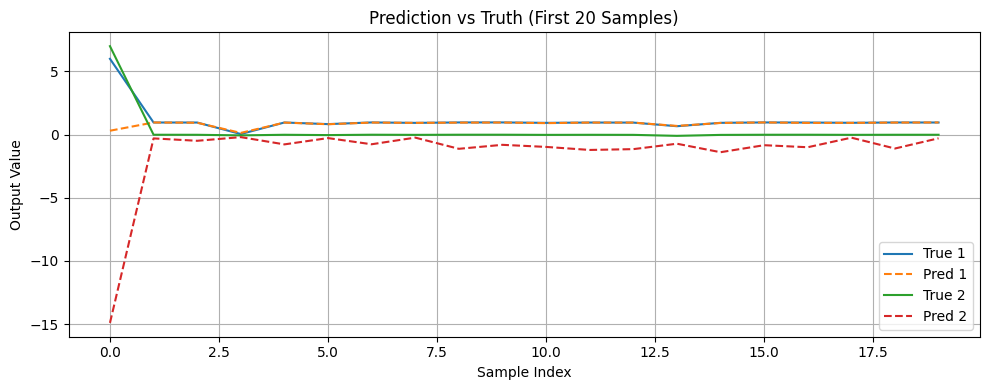

In [ ]:
# 📌 STEP 5: Evaluate model and visualize

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict
y_pred = model.predict(x_scaled)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"📉 MSE on Test Set: {mse:.6f}")
print(f"📊 R² Score: {r2:.4f}")

# Plot first 20 samples
plt.figure(figsize=(10, 4))
plt.plot(y[:20, 0], label="True 1")
plt.plot(y_pred[:20, 0], label="Pred 1", linestyle='--')
plt.plot(y[:20, 1], label="True 2")
plt.plot(y_pred[:20, 1], label="Pred 2", linestyle='--')
plt.title("Prediction vs Truth (First 20 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Output Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
